In [4]:
def min_cost_for_trip(N, K, prices):
    # 初始化dp数组，大小为N x (K+1)，初始值为无穷大
    dp = [[float('inf')] * (K + 1) for _ in range(N)]
    
    # 第一天初始化
    for j in range(1, K + 1):
        dp[0][j] = j * prices[0]
    
    # 设置dp[0][0]为无穷大，表示第一天不能没有食物
    dp[0][0] = float('inf')
    
    # 动态规划填表
    for i in range(1, N):
        for j in range(K + 1):  # 包括j = K的情况，尽管我们不会从dp[i-1][K+1]获取值
            if j > 0:
                dp[i][j] = min(dp[i][j], dp[i-1][j-1])  # 消耗一份食物
            if j < K:  # 确保j+1不会超出范围
                dp[i][j] = min(dp[i][j], dp[i-1][j+1] + prices[i])  # 购买一份食物
    
    # 找出最后一天的最小花费（忽略dp[N-1][0]，因为它表示没有食物）
    min_cost = min(dp[N-1][1:])
    
    # 打印dp数组（可选，用于调试）
    # print(dp)
    
    return min_cost if min_cost != float('inf') else -1  # -1 表示无解，即无法每天保证有食物

# 示例
N = 5  # 总天数
K = 3  # 最大携带食物数量
prices = [2, 3, 1, 4, 2]  # 补给站每天的食物价格

print(min_cost_for_trip(N, K, prices))  # 输出最低花费

3


实验

In [1]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import numpy as np
import numpy as np  
from package_py import AdaBoost9

def evaluate_classifier_multiple_times(classifier, X, y, n_iterations=10,max_depth=1):  
    all_accuracies = []  
    all_f1_scores = []  
  
    for iteration in range(n_iterations):  
        # 设置十折交叉验证，每次使用不同的random_state  
        kf = KFold(n_splits=10, shuffle=True, random_state=42 + iteration * 10)  # 使用迭代次数作为随机种子  
        scores = []  
        f1_scores_iter = []  
  
        # 遍历交叉验证的每一折  
        for fold, (train_index, test_index) in enumerate(kf.split(X)):  
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]  
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]  
  
            # 将pandas读取的数据转化为list形式
            X_train = X_train.values.tolist()  
            y_train = y_train.values.tolist()  
            X_test = X_test.values.tolist()  
            y_test = y_test.values.tolist()  
           
            X_train = np.array(X_train)
            y_train = np.array(y_train)

            # print('X_train',X_train)
            # 创建并训练AdaBoost模型
            ada = classifier.AdaBoost(n_estimators=10)
            ada.fit(X_train, y_train)

            # 在测试集上进行预测
            y_pred = ada.predict(X_test)
            y_pred+=1
            # print('y_pred',y_pred,len(y_pred))
            # print('y_test',y_test,len(y_test))
            accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)  
            f1 = f1_score(y_test, y_pred, average='macro')  
            scores.append(accuracy)  
            f1_scores_iter.append(f1)  
        # print('y_test',y_test,len(y_test))
        mean_accuracy = np.mean(scores)  
        std_accuracy = np.std(scores)  
        mean_f1 = np.mean(f1_scores_iter)  
        print(f'第{iteration}次',mean_accuracy)  
        all_accuracies.append(mean_accuracy)  
        all_f1_scores.append(mean_f1)  
  
        # print(f"Iteration {iteration + 1}: Mean Accuracy = {mean_accuracy:.4f}, Std Accuracy = {std_accuracy:.4f}, Mean F1 Score = {mean_f1:.4f}")  

    overall_mean_accuracy = np.mean(all_accuracies)  
    overall_std_accuracy = np.std(all_accuracies)  
    overall_mean_f1 = np.mean(all_f1_scores)  
  
    return overall_mean_accuracy, overall_std_accuracy, overall_mean_f1  
  
# # 示例调用  
# # classifier_instance = YourClassifier()  # 替换为你的分类器实例  
# # X = your_X_data  # 替换为你的特征数据  
# # y = your_y_data  # 替换为你的标签数据  
# # k = your_k_value  # 替换为你的k值  
# # evaluate_classifier_multiple_times(classifier_instance, X, y, k)


In [2]:
import pandas as pd
from sklearn.discriminant_analysis import StandardScaler

from package_py import AdaBoost9

    
file_paths =[ "data\\gla.xls"]  # 实际文件路径
# file_paths =[ "data\\bal.xls", "data\\gla_lisan_result.xlsx", "data\\hay.xls", "data\\iri.xls", "data\\new.xls", "data\\win_lisan_result.xls", "data\\zoo.xls"]  # 实际文件路径
# mean_accuracys=[]
for i in range(len(file_paths)):
    file_path=file_paths[i]

    data = pd.read_excel(file_path, header=None)  
    # 将数据分为特征和标签  
    X = data.iloc[:, :-1]  # 前n列是特征  
    y = data.iloc[:, -1]   # 最后一列是分类标签  
    
    # 数据标准hua
    scaler = StandardScaler()  
    X_scaled = scaler.fit_transform(X)
    X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
    
    mean_accuracy,std_accuracy,f1=evaluate_classifier_multiple_times(AdaBoost9,X_scaled_df,y,n_iterations=10,max_depth=3)
    # mean_accuracys.append(mean_accuracy)

    # 使用 f-string 格式化输出  
    print(f'{file_path} \n  mean_accuracy: {mean_accuracy:.3f} std_accuracy: {std_accuracy:.3f} f1: {f1:.3f}')



第0次 0.6642857142857144
第1次 0.6822510822510822
第2次 0.6733766233766234
第3次 0.6956709956709958
第4次 0.6497835497835498
第5次 0.6818181818181819
第6次 0.6625541125541126
第7次 0.6731601731601733
第8次 0.6861471861471861
第9次 0.674025974025974
data\gla.xls 
  mean_accuracy: 0.674 std_accuracy: 0.012 f1: 0.588


调库

In [ ]:
import pandas as pd
from sklearn.metrics import f1_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
import numpy as np

# 文件路径列表
file_paths = [r"data\win.xls"]  # 你可以根据需要添加更多文件路径
# # 文件路径列表
# file_paths = [
#     r"data\bal.xls", r"data\gla.xls", r"data\hay.xls",
#     r"data\iri.xls", r"data\new_avoid_negtive.xls", r"data\win.xls", r"data\zoo.xls"
# ]


# 初始化结果字典（虽然在此示例中未使用，但保留以备后续扩展）
results = {}

# 对每个数据集进行十次十折交叉验证
for file_path in file_paths:
    # 读取Excel文件
    df = pd.read_excel(file_path, header=None)
    
    # 分离特征和标签
    X = df.iloc[:, :-1].values  # 特征
    y = df.iloc[:, -1].values    # 标签，并转换为整数类型
    y = y.astype(int)
    
    # 创建弱学习器：决策树桩
    base_estimator = DecisionTreeClassifier(max_depth=3, random_state=42)
    
    # 创建AdaBoost分类器
    ada_boost = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42, learning_rate=1.0)
    
    # 初始化用于存储每次交叉验证结果的列表
    accuracies = []
    f1_scores_list = []
    
    # 进行十次十折交叉验证
    for i in range(10):
        kf = KFold(n_splits=10, shuffle=True, random_state=42 + i * 10)
        
        # 使用交叉验证计算准确度
        scores = cross_val_score(ada_boost, X, y, cv=kf, scoring='accuracy')
        accuracies.append(scores.mean())
        
        # 使用cross_val_predict获取所有折叠的预测
        y_preds = cross_val_predict(ada_boost, X, y, cv=kf)
        
        # 计算F1分数（macro平均）
        f1_scores = f1_score(y, y_preds, average='macro')
        f1_scores_list.append(f1_scores)
        
        # 打印当前迭代的准确度
        print(f"数据集{file_path}第{i+1}次十折准确度: {scores.mean()}")
    
    # 计算十次交叉验证的平均准确度和F1分数
    mean_accuracy = np.mean(accuracies)
    mean_f1 = np.mean(f1_scores_list)
    
    # 打印数据集的平均准确度和F1分数
    print(f"数据集{file_path}平均准确度: {mean_accuracy}")
    print(f"数据集{file_path}平均F1分数: {mean_f1}")

d:\anaconda\envs\TF\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "d:\anaconda\envs\TF\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\anaconda\envs\TF\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 486, in fit
    return super().fit(X, y, sample_weight)
  File "d:\anaconda\envs\TF\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 132, in fit
    self._validate_estimator()
  File "d:\anaconda\envs\TF\lib\site-pack

ValueError: MLPClassifier doesn't support sample_weight.

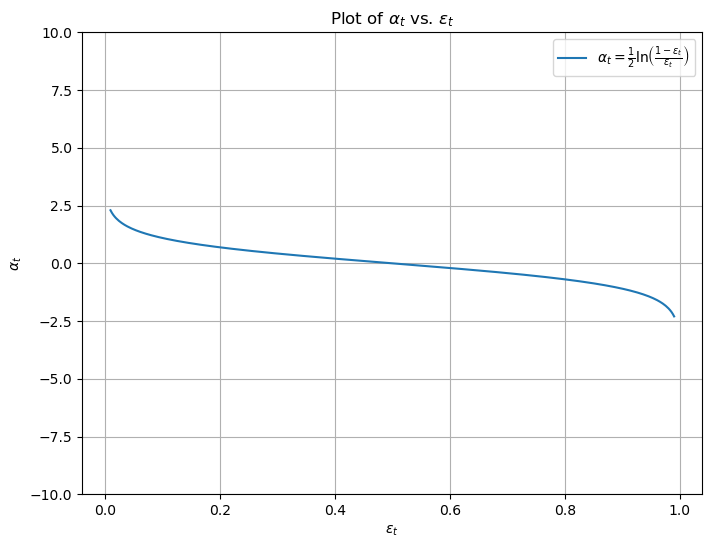

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 定义epsilon_t的取值范围（不包括0和1）
epsilon_t = np.linspace(0.01, 0.99, 400)

# 计算alpha_t
alpha_t = 0.5 * np.log((1 - epsilon_t) / epsilon_t)

# 绘制图像
plt.figure(figsize=(8, 6))
plt.plot(epsilon_t, alpha_t, label=r'$\alpha_t = \frac{1}{2} \ln\left(\frac{1 - \epsilon_t}{\epsilon_t}\right)$')
plt.xlabel(r'$\epsilon_t$')
plt.ylabel(r'$\alpha_t$')
plt.title(r'Plot of $\alpha_t$ vs. $\epsilon_t$')
plt.legend()
plt.grid(True)
plt.ylim(-10, 10)  # 设置y轴的显示范围，以便更好地观察函数的变化
plt.show()

In [ ]:
n=100
w=np.ones(n)/n


In [1]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
# 可以继续添加其他可用的弱学习器

class AdaBoost(BaseEstimator, ClassifierMixin):
    def __init__(self, base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100):
        self.base_estimator = base_estimator  # 弱学习器类及其参数
        self.n_estimators = n_estimators  # 弱学习器的数量
        self.models = []  # 存储每个弱学习器
        self.model_weights = []  # 存储每个弱学习器的权重

    def fit(self, X, y):
        N, _ = X.shape  # 样本数量与特征数量
        # 初始化样本权重，所有样本权重相同
        w = np.ones(N) / N

        for _ in range(self.n_estimators):
            # 训练一个弱学习器
            model = clone(self.base_estimator)  # 使用sklearn的clone函数来复制基学习器，避免在迭代中共享参数
            model.fit(X, y, sample_weight=w)
            y_pred = model.predict(X)

            # 计算误差率
            misclassified = (y_pred != y)
            error = np.dot(w, misclassified) / np.sum(w)

            # 如果误差率大于0.5，则丢弃当前学习器（虽然理论上不应该发生，但出于健壮性考虑）
            if error > 0.5:
                break

            # 计算弱学习器的权重
            alpha = 0.5 * np.log((1 - error) / (error + 1e-10))  # 添加小常数避免除以0

            # 更新样本权重
            w = w * np.exp(-alpha * y * y_pred)
            w = w / np.sum(w)  # 归一化

            # 保存弱学习器及其权重
            self.models.append(model)
            self.model_weights.append(alpha)

    def predict(self, X):
        # 初始化预测结果
        y_pred = np.zeros(X.shape[0])

        # 遍历所有弱学习器，根据权重进行投票
        for model, alpha in zip(self.models, self.model_weights):
            y_pred += alpha * model.predict(X)

        # 根据符号决定最终分类
        y_pred = np.sign(y_pred)

        # 如果需要，将标签转换为0和1
        # y_pred = np.where(y_pred > 0, 1, 0)

        return y_pred

# 示例用法
if __name__ == "__main__":
    from sklearn.datasets import make_classification
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score
    from sklearn.base import clone  # 导入clone函数以复制基学习器

    # 创建一个示例数据集
    X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
    y = np.where(y == 0, -1, 1)  # 将标签转换为-1和1

    # 划分训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 创建并训练AdaBoost模型，使用LogisticRegression作为弱学习器
    ada = AdaBoost(base_estimator=LogisticRegression(max_iter=100, solver='liblinear'), n_estimators=50)
    ada.fit(X_train, y_train)

    # 在测试集上进行预测
    y_pred = ada.predict(X_test)

    # 计算准确率
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.84


In [7]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

class AdaBoost:
    def __init__(self, n_estimators=100):
        self.n_estimators = n_estimators  # 弱学习器的数量
        self.models = []  # 存储每个弱学习器
        self.model_weights = []  # 存储每个弱学习器的权重

    def fit(self, X, y):
        N, _ = X.shape  # 样本数量与特征数量
        # 初始化样本权重，所有样本权重相同
        w = np.ones(N) / N

        for _ in range(self.n_estimators):
            # 训练一个弱学习器（决策树桩）
            model = DecisionTreeClassifier(max_depth=1)
            model.fit(X, y, sample_weight=w)
            y_pred = model.predict(X)

            # 计算误差率
            misclassified = (y_pred != y)
            error = np.dot(w, misclassified) / np.sum(w)

            # 计算弱学习器的权重
            alpha = 0.5 * np.log((1 - error) / (error + 1e-10))  # 添加小常数避免除以0

            # 更新样本权重
            w = w * np.exp(-alpha * y * y_pred)
            w = w / np.sum(w)  # 归一化

            # 保存弱学习器及其权重
            self.models.append(model)
            self.model_weights.append(alpha)

    def predict(self, X):
        # 初始化预测结果
        y_pred = np.zeros(X.shape[0])

        # 遍历所有弱学习器，根据权重进行投票
        for model, alpha in zip(self.models, self.model_weights):
            y_pred += alpha * model.predict(X)

        # 根据符号决定最终分类
        y_pred = np.sign(y_pred)

        # 由于sklearn的y要求是+1或-1，所以我们需要进行转换
        # 如果你的标签是0和1，可以在这里添加一步转换：y_pred = np.where(y_pred > 0, 1, 0)

        return y_pred

# 示例用法
if __name__ == "__main__":
    from sklearn.datasets import make_classification
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score

    # 创建一个示例数据集
    X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
    y = np.where(y == 0, -1, 1)  # 将标签转换为-1和1

    # 划分训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 创建并训练AdaBoost模型
    ada = AdaBoost(n_estimators=50)
    ada.fit(X_train, y_train)

    # 在测试集上进行预测
    y_pred = ada.predict(X_test)

    # 计算准确率
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.88


In [1]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

class AdaBoost:
    def __init__(self, n_estimators=50):
        self.n_estimators = n_estimators  # 弱学习器的数量
        self.models = []  # 存储每个弱学习器
        self.model_weights = []  # 存储每个弱学习器的权重

    def fit(self, X, y):
        N, _ = X.shape  # 样本数量与特征数量
        # 初始化样本权重，所有样本权重相同
        w = np.ones(N) / N

        for _ in range(self.n_estimators):
            # 训练一个弱学习器（决策树桩）
            model = DecisionTreeClassifier(max_depth=1)
            model.fit(X, y, sample_weight=w)
            y_pred = model.predict(X)

            # 计算误差率
            misclassified = (y_pred != y)
            error = np.dot(w, misclassified) / np.sum(w)

            # 计算弱学习器的权重
            alpha = 0.5 * np.log((1 - error) / (error + 1e-10))  # 添加小常数避免除以0

            # 更新样本权重
            w = w * np.exp(-alpha * y * y_pred)
            w = w / np.sum(w)  # 归一化

            # 保存弱学习器及其权重
            self.models.append(model)
            self.model_weights.append(alpha)

    def predict(self, X):
        # 初始化预测结果
        y_pred = np.zeros(X.shape[0])

        # 遍历所有弱学习器，根据权重进行投票
        for model, alpha in zip(self.models, self.model_weights):
            y_pred += alpha * model.predict(X)

        # 根据符号决定最终分类
        y_pred = np.sign(y_pred)

        # 由于sklearn的y要求是+1或-1，所以我们需要进行转换
        # 如果你的标签是0和1，可以在这里添加一步转换：y_pred = np.where(y_pred > 0, 1, 0)

        return y_pred

# 示例用法
if __name__ == "__main__":
    from sklearn.datasets import make_classification
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score

    # 创建一个示例数据集
    X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
    y = np.where(y == 0, -1, 1)  # 将标签转换为-1和1

    # 划分训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 创建并训练AdaBoost模型
    ada = AdaBoost(n_estimators=50)
    ada.fit(X_train, y_train)

    # 在测试集上进行预测
    y_pred = ada.predict(X_test)

    # 计算准确率
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.88


In [2]:
ada.model_weights

[0.9786940180459596,
 0.40030185042285094,
 0.20379393950623495,
 0.13480796492959607,
 0.13839702595244313,
 0.22576055005174556,
 0.21301380229999947,
 0.14428483153364097,
 0.15920262280403294,
 0.18890080505157053,
 0.21117846328312398,
 0.06150123260703644,
 0.06789744598155734,
 0.17361007953663693,
 0.15956626907037133,
 0.07183237379141841,
 0.06483442468600625,
 0.060881980195973524,
 0.057384243356044966,
 0.13340790531841099,
 0.10836605493232108,
 0.04389612255806674,
 0.07236958319525849,
 0.08934116884554397,
 0.1718275542675311,
 0.2016382470768929,
 0.21421380290869022,
 0.15406651579577263,
 0.15854253100113336,
 0.13137340510204046,
 0.16405589902337372,
 0.18772497505423202,
 0.1121482970980514,
 0.08264962723629503,
 0.0714760599670678,
 0.09950982379299729,
 0.11562552887424575,
 0.1340078209341261,
 0.1299085021507696,
 0.08535188945851153,
 0.14636563791676868,
 0.06396533999763084,
 0.12179430752070383,
 0.13880295493596087,
 0.16201209490523946,
 0.083888078616